In [1]:
import numpy as np

import os
from glob import glob
from tqdm import tqdm

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

import pandas as pd
import pickle as pkl

pd.set_option('display.max_rows', 500)

In [2]:
path_to_usdb_csv = './sd_GT_usdb.csv'
df_usdb = pd.read_csv(path_to_usdb_csv)

In [3]:
usdbmil = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_gt/usdbmil.vec',skiprows=1)
usdb = np.loadtxt('/p/lustre2/fox39/shmuq/usdb/shmuq_gt/usdb.vec',skiprows=1)

In [4]:
n_transitions = len(df_usdb[df_usdb['include']==True])
print('# transitions =', n_transitions)

# transitions = 185


In [5]:
gA = 1.28

df_usdb['Fermi'] = (df_usdb['Tmirror']==True) & (df_usdb['deltaJ']==0) & (df_usdb['Exf']==0.0)
df_usdb['Bth_gA2'] = df_usdb['Bth']*gA**2
df_usdb['Berr_gA2'] = df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Fermi']
df_usdb['Berr'] = df_usdb['Bexp']-df_usdb['Bth']-1.0*df_usdb['Fermi']


Simply using $g_A$ at the free-nucleon value, unquenched, we have this distribution of absolute errors for B(GT)

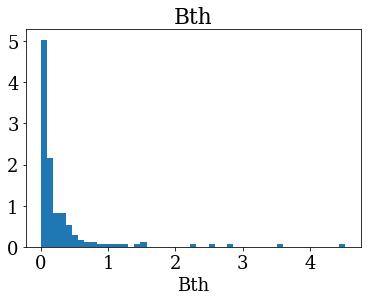

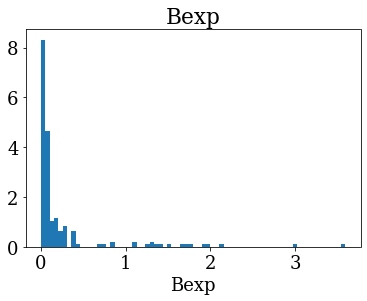

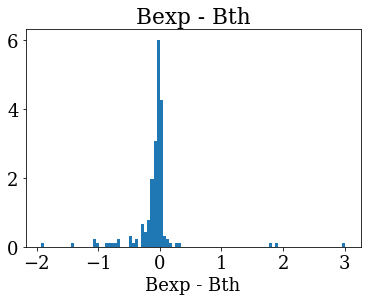

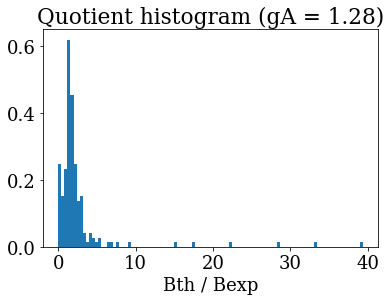

In [6]:
y = np.array(df_usdb['Bth_gA2'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bth')
plt.xlabel('Bth')
plt.show()

y = np.array(df_usdb['Bexp'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bexp')
plt.xlabel('Bexp')
plt.show()

y = np.array(df_usdb['Bexp'] - df_usdb['Bth_gA2'] - 1*df_usdb['Fermi'])
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Bexp - Bth')
plt.xlabel('Bexp - Bth')
plt.show()

y = np.array(df_usdb['Bth_gA2'] / (df_usdb['Bexp']- 1*df_usdb['Fermi']))
plt.hist(y, bins=optimal_n_bins(y), density=True)
plt.title(f'Quotient histogram (gA = {gA})')
plt.xlabel('Bth / Bexp')
plt.show()

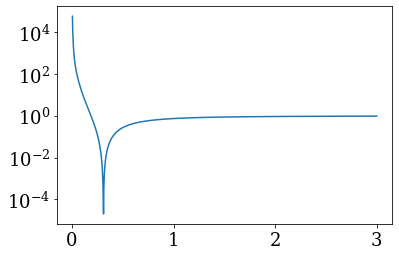

In [7]:
from scipy.optimize import minimize

n_params = 66

def objective(dBap,q,df):
    chi_squared = np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Fermi'])**2/(df['sigma_B']**2 + dBap**2)) 
    dof = n_transitions - n_params
    return (chi_squared/dof - 1)**2


domain = np.linspace(0,3,1000)
plt.semilogy(domain,[objective(x,0.77,df_usdb) for x in domain])
plt.show()


In [8]:
dBap = domain[np.argmin([objective(x,0.77,df_usdb) for x in domain])]

In [9]:
print('a priori B(GT) std. dev. =', dBap)
print('a priori B(GT) variance =', dBap**2)

a priori B(GT) std. dev. = 0.30930930930930933
a priori B(GT) variance = 0.095672248825402


In [10]:
df_usdb['Bresid'] = df_usdb['Berr']/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)
df_usdb['Bresid_gA2'] = (df_usdb['Bexp']-df_usdb['Bth_gA2']-1.0*df_usdb['Fermi'])/np.sqrt(df_usdb['sigma_B']**2 + dBap**2)

In [11]:
with open('gt_results_10k_100422.pkl','rb') as fh:
    data = pkl.load(fh)
    
int_vec_list = []
mil_vec_list = []
df_dict = {}
for number in data:
    df_dict[number] = data[number][0]
    int_vec_list.append(data[number][1])
    mil_vec_list.append(data[number][2])


In [12]:
df_dict['02000']

Unnamed: 0 parent daughter decay  Zi  Ni      Exi   Ji  ni  Zf  ...  \
0             9    20F     20Ne    b-   9  11    0.000    2   1  10  ...   
1            10    21F     21Ne    b-   9  12    0.000  5/2   1  10  ...   
2            11    21F     21Ne    b-   9  12    0.000  5/2   1  10  ...   
3            12    21F     21Ne    b-   9  12    0.000  5/2   1  10  ...   
4            13    21F     21Ne    b-   9  12    0.000  5/2   1  10  ...   
5            14    21F     21Ne    b-   9  12    0.000  5/2   1  10  ...   
6            15    21F     21Ne    b-   9  12    0.000  5/2   1  10  ...   
7            16    22F     22Ne    b-   9  13    0.000    4   1  10  ...   
8            17    22F     22Ne    b-   9  13    0.000    4   1  10  ...   
9            18    22F     22Ne    b-   9  13    0.000    4   1  10  ...   
10           19    22F     22Ne    b-   9  13    0.000    4   1  10  ...   
11           20    22F     22Ne    b-   9  13    0.000    4   1  10  ...   
12           21    23F     23Ne    b-   9  14    0.000  5/2   1  10  ...   
13           22    23F     23Ne    b-   9  14    0.000  5/2   1  10  ...   
14           23    23F     23Ne    b-   9  14    0.000  5/2   1  10  ...   
15           24    23F     23Ne    b-   9  14    0.000  5/2   1  10  ...   
16           25    23F     23Ne    b-   9  14    0.000  5/2   1  10  ...   
17           26   23Ne     23Na    b-  10  13    0.000  5/2   1  11  ...   
18           27   23Ne     23Na    b-  10  13    0.000  5/2   1  11  ...   
19           28   23Ne     23Na    b-  10  13    0.000  5/2   1  11  ...   
20           29   23Ne     23Na    b-  10  13    0.000  5/2   1  11  ...   
21           30   24Ne     24Na    b-  10  14    0.000    0   1  11  ...   
22           31   24Ne     24Na    b-  10  14    0.000    0   1  11  ...   
23           32   25Ne     25Na    b-  10  15    0.000  1/2   1  11  ...   
24           33   25Ne     25Na    b-  10  15    0.000  1/2   1  11  ...   
25           34   25Ne     25Na    b-  10  15    0.000  1/2   1  11  ...   
26           35   25Ne     25Na    b-  10  15    0.000  1/2   1  11  ...   
27           36   26Ne     26Na    b-  10  16    0.000    0   1  11  ...   
28           37   27Ne     27Na    b-  10  17    0.000  3/2   1  11  ...   
29           38   27Ne     27Na    b-  10  17    0.000  3/2   1  11  ...   
30           39   27Ne     27Na    b-  10  17    0.000  3/2   1  11  ...   
31           40   28Ne     28Na    b-  10  18    0.000    0   1  11  ...   
32           41   28Ne     28Na    b-  10  18    0.000    0   1  11  ...   
33           42   28Ne     28Na    b-  10  18    0.000    0   1  11  ...   
34           43   28Ne     28Na    b-  10  18    0.000    0   1  11  ...   
35           44   28Ne     28Na    b-  10  18    0.000    0   1  11  ...   
36           45   28Ne     28Na    b-  10  18    0.000    0   1  11  ...   
37           46   24Na     24Mg    b-  11  13  472.207    1   1  12  ...   
38           49   25Na     25Mg    b-  11  14    0.000  5/2   1  12  ...   
39           50   25Na     25Mg    b-  11  14    0.000  5/2   1  12  ...   
40           51   25Na     25Mg    b-  11  14    0.000  5/2   1  12  ...   
41           52   25Na     25Mg    b-  11  14    0.000  5/2   1  12  ...   
42           53   25Na     25Mg    b-  11  14    0.000  5/2   1  12  ...   
43           54   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
44           55   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
45           56   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
46           57   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
47           58   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
48           59   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
49           60   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
50           61   26Na     26Mg    b-  11  15    0.000    3   1  12  ...   
51           62   26Na     26Mg    b-  11  15    0.00

In [13]:
n_samples = len(df_dict.keys())
print('n samples =', n_samples)

n samples = 10000


In [14]:
int_vec_array = np.array(int_vec_list)
mil_vec_array = np.array(mil_vec_list)

### PCA-parameter sample distributions
Note that below each is 1/variance = Hessian eigenvalue.

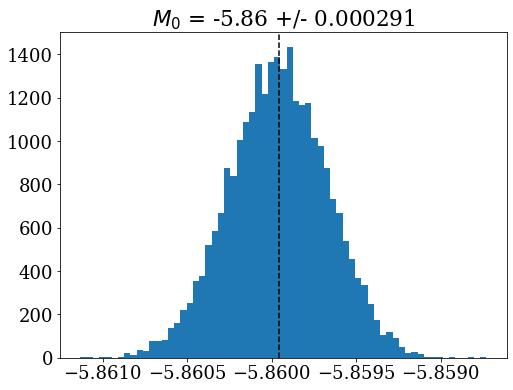

1/variance =  11770861.519379986


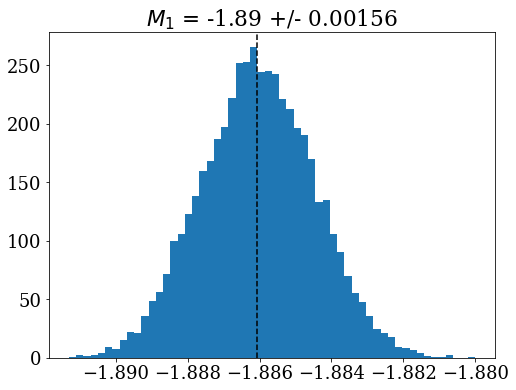

1/variance =  408798.64480800304


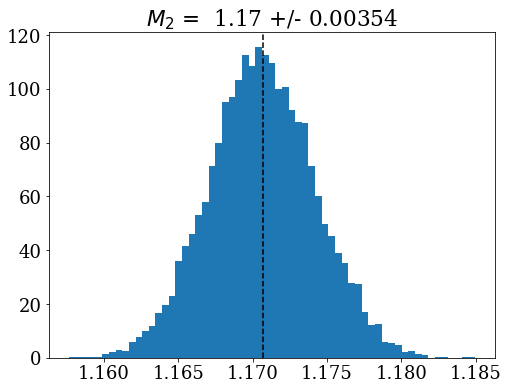

1/variance =  79744.14741421954


In [15]:
# for mi in range(n_params):
for mi in range(3):
    y = mil_vec_array[:,mi]
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True)
    plt.title(fr'$M_{mi}$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdbmil[mi],c='k',ls='--')
    plt.show()
    print('1/variance = ',(1/np.std(y))**2)

### USDB parameter sample distributions

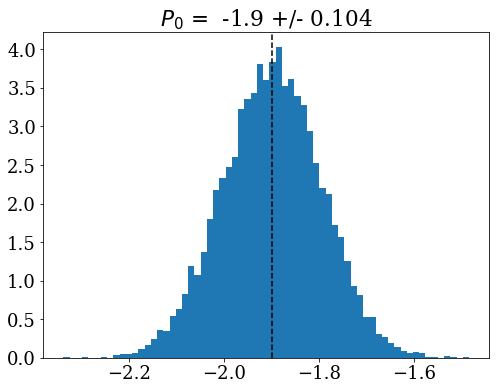

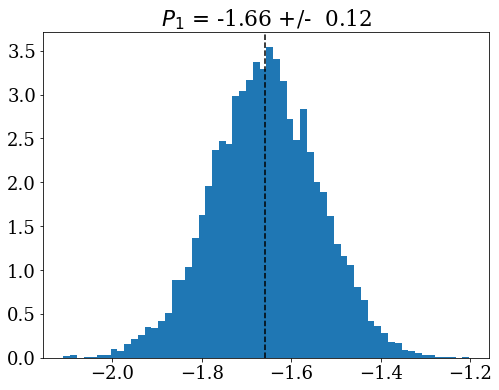

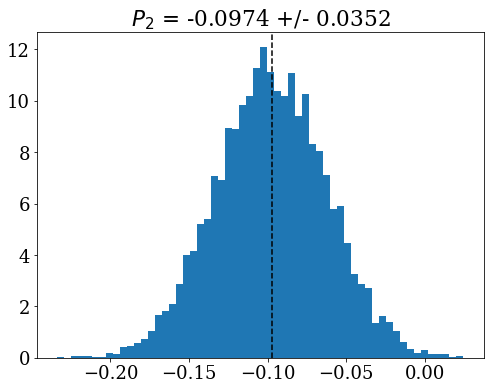

In [16]:
# for pi in range(n_params):
for pi in range(3):
    y = int_vec_array[:,pi]
    plt.figure(figsize=(8,6))
    plt.hist(y,bins=optimal_n_bins(y),density=True)
    plt.title(fr'$P_{pi}$ = {np.mean(y):5.3} +/- {np.std(y):5.3}')
    plt.axvline(usdb[pi],c='k',ls='--')
    plt.show()

### Shell-model B(GT) distributions 
These are with $g_A = Q = 1$, so just getting an idea of the spreads and distributions.

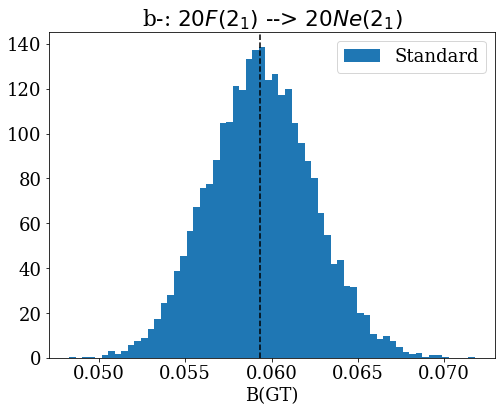

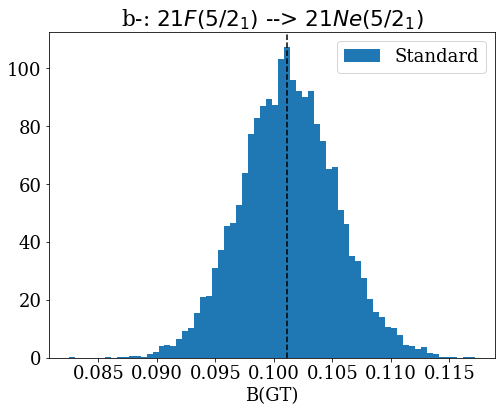

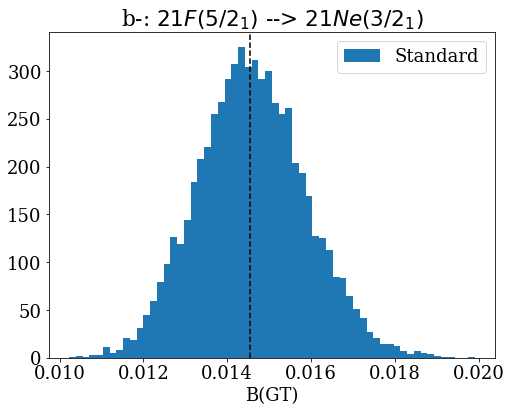

In [17]:
# for ti in range(n_transitions):
for ti in range(3):
    if not df_usdb.iloc[ti]['include']:
        pass
    parent = df_usdb.iloc[ti]['parent']
#     parent_mass = df_usdb.iloc[ti]['Ni'] + df_usdb.iloc[ti]['Zi']
    daughter = df_usdb.iloc[ti]['daughter']
#     daughter_mass = df_usdb.iloc[ti]['Nf'] + df_usdb.iloc[ti]['Zf']
    decay_type = df_usdb.iloc[ti]['decay']
    ji = df_usdb.iloc[ti]['Ji']
    ni = df_usdb.iloc[ti]['ni']
    jf = df_usdb.iloc[ti]['Jf']
    nf = df_usdb.iloc[ti]['nf']
    Bexp = df_usdb.iloc[ti]['Bexp']
    Bexp_unc = df_usdb.iloc[ti]['sigma_B']
    Bth_vec = [df_dict[run_num_string].iloc[ti]['Bth'] for run_num_string in list(df_dict.keys()) ]
#     for run_num_string in list(df_dict.keys()):
#         Bth_vec.append(df_dict[run_num_string].iloc[ti]['Bth'])

    plt.figure(figsize=(8,6))
    plt.hist(Bth_vec,optimal_n_bins(Bth_vec),density=True,label='Standard')
#     blocks = bayesian_blocks_mod(Bth_vec)
#     plt.hist(Bth_vec, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
    title_string = fr'{decay_type}: ${parent}({ji}_{ni})$ --> ${daughter}({jf}_{nf})$'
    plt.title(title_string)
    plt.xlabel('B(GT)')
    plt.axvline(df_usdb['Bth'].iloc[ti],c='k',ls='--')
    plt.legend()
    plt.show()
    
    

In [18]:
def loss(q,df):
    return np.sum((df['Bexp']-q**2*df['Bth_gA2']-1.0*df['Tmirror'])**2/(df['sigma_B']**2 + dBap**2))

In [19]:
for df in tqdm(df_dict.values()):
    df['Fermi'] = (df['Tmirror']==True) & (df['deltaJ']==0) & (df['Exf']==0.0)
    df['Bth_gA2'] = df['Bth']*gA**2
    df['Berr_gA2'] = df['Bexp']-df['Bth_gA2']-1.0*df['Fermi']
    df['Berr'] = df['Bexp']-df['Bth']-1.0*df['Fermi']
    df['Bresid'] = df['Berr']/np.sqrt(df['sigma_B']**2 + dBap**2)
    df['Bresid_gA2'] = (df['Bexp']-df['Bth_gA2']-1.0*df['Fermi'])/np.sqrt(df['sigma_B']**2 + dBap**2)

100%|██████████| 10000/10000 [01:10<00:00, 141.23it/s]


In [20]:
Bexp_vec = []
Bth_gA2_array = [] # n_samples x n_transitions
B_variance_total = []
for df in tqdm(df_dict.values()):  #loop over samples
    Bth_gA2_array.append(np.array(df['Bth_gA2']))
Bexp_vec = np.array(df['Bexp'] - 1.0*df['Fermi'])
B_variance_total = np.array(df['sigma_B']**2 + dBap**2)


100%|██████████| 10000/10000 [00:00<00:00, 19861.71it/s]


In [21]:
Bexp_vec = np.array(Bexp_vec)
Bth_gA2_array = np.array(Bth_gA2_array)
B_variance_total = np.array(B_variance_total)

In [22]:
Bexp_vec.shape

(185,)

In [23]:
# SUM OVER DATA, AVERAGE OVER LIKELIHOODS!!!
def likelihood(q,sample):
#     chi_squared_list = []
#     for idx,Bth_sample in enumerate(Bth_gA2_array):
    R_sqr_vec = (Bexp_vec - q**2 * Bth_gA2_array[sample] )**2 / B_variance_total
    chi_sq = np.sum(R_sqr_vec)  #this must be a scalar
    return  np.exp( - 0.5 * chi_sq ) 

def prior(q):
    if (q>0.5) and (q<1.0):
        return 1.0
    else:
        return 0.0
    
def log_posterior(q):
    x = prior(q) * np.mean(np.array( [likelihood(q,k) for k in range(n_samples)] ))
    # yes, mean is correct, although it should not contribute to UQ
    return np.log(x)

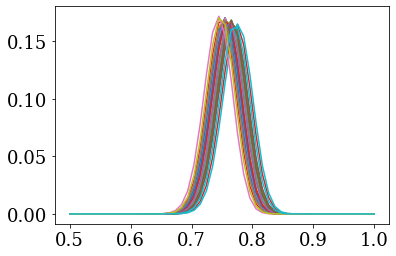

In [24]:
# plot likelihood of many individual samples
domain = np.linspace(0.5,1.0)
for i in range(40):
    L = np.array([likelihood(q,i) for q in domain])
    plt.plot(domain,L/sum(L))
plt.show()


In [25]:
def objective(q):
    return -log_posterior(q)

from scipy.optimize import minimize,minimize_scalar

method = ['L-BFGS-B','TNC','SLSQP','Powell','trust-constr']
# opt_result = minimize(objective,0.7,bounds=[(0,1)],method=method[4])
opt_result =  minimize_scalar(objective,bounds=(0,1),method='bounded')

/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/scipy/optimize/optimize.py:1980: RuntimeWarning: invalid value encountered in double_scalars
  p = (xf - fulc) * q - (xf - nfc) * r
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/scipy/optimize/optimize.py:1981: RuntimeWarning: invalid value encountered in double_scalars
  q = 2.0 * (q - r)


In [26]:
opt_result

     fun: 59.28973726075956
 message: 'Solution found.'
    nfev: 9
  status: 0
 success: True
       x: 0.7624696601084101

In [27]:
def second_derivative(f,x,h):
    y = - f(x+2*h) + 16*f(x+h) - 30*f(x) + 16*f(x-h) - f(x-2*h)
    return y/(12*h*h)

In [28]:
C_Q_list = []
step_list = np.logspace(-1,-10,20)
for step in step_list:
    C_Q_list.append(1/second_derivative(objective,opt_result.x,step))

/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


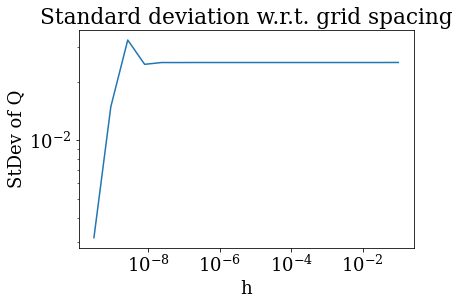

In [29]:
plt.loglog(step_list,[np.sqrt(s) for s in C_Q_list])
plt.xlabel('h')
plt.ylabel('StDev of Q')
plt.title('Standard deviation w.r.t. grid spacing')
plt.show()

In [30]:
C_Q = 1/second_derivative(objective,opt_result.x,1e-5)
print(f'Standard deviation of Q about optimum = {np.sqrt(C_Q)}')

Standard deviation of Q about optimum = 0.025049787173112032


In [162]:
import emcee
from multiprocessing import Pool
import time

In [163]:
n_walkers = 100
n_steps = 2200
q0 = np.random.rand(n_walkers,1)*0.5 + 0.5
with Pool() as pool:
    sampler = emcee.EnsembleSampler(n_walkers, 1, log_posterior, pool=pool)
    start = time.time()
    sampler.run_mcmc(q0, n_steps, progress=True,);
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))

  0%|          | 0/2200 [00:00<?, ?it/s]/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/workspace/fox39/anaconda3/envs/uq/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWa

In [164]:
fig, ax = plt.subplots(1, sharex=True,figsize=(8,4))
ax.plot(sampler.chain[:, :, 0].T, '-k', alpha=0.5);
plt.show()

In [31]:
q_fn = 'q_results_100422.pkl'
write_q = False

if write_q:
    chain = sampler.chain
    with open(q_fn,'wb') as fh:
        pkl.dump(chain,fh)
else:
    with open(q_fn,'rb') as fh:
        chain = pkl.load(fh)

### Quenching factor distribution

In [32]:
# We choose a warm-up time
nwarmup = 200 # warm up

# sampler.chain is of shape (nwalkers, nsteps, ndim)
# we'll throw-out the warmup points and reshape:
emcee_trace = chain[:, nwarmup:, :].reshape(-1, 1).flatten()
# emcee_lnprob = lnprobability[:, nwarmup:].reshape(-1).flatten()

In [33]:
emcee_trace.shape

(200000,)

Q(MCMC) = 0.762 +/- 0.0253


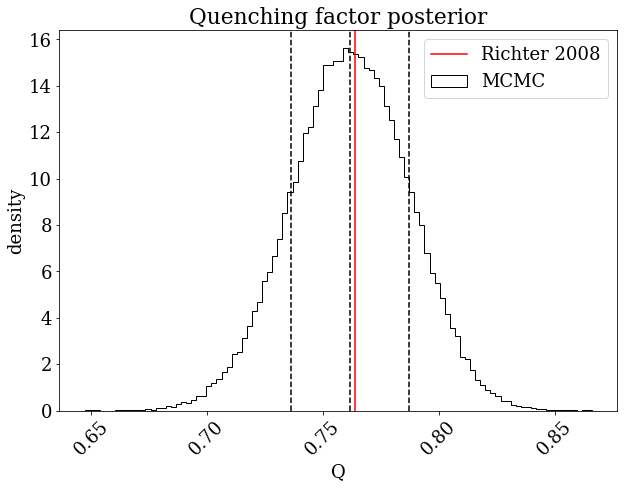

In [34]:
y = emcee_trace[:]
# y = y[y>0.74]
plt.figure(figsize=(10,7))
plt.hist(y,bins=optimal_n_bins(y),histtype='step',density=True,color='k',label='MCMC')
# blocks = bayesian_blocks_mod(y)
# plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
q_mean = np.mean(y)
q_std = np.std(y)
plt.title(f"Quenching factor posterior")
print(f"Q(MCMC) = {q_mean:5.3} +/- {q_std:5.3}")
# plt.title(f"Quenching factor Q via MCMC\n{q_mean:5.3} +/- {q_std:5.3}")
plt.xlabel('Q')
plt.ylabel('density')
plt.axvline(q_mean,c='k',ls='--')
plt.axvline(q_mean-q_std,c='k',ls='--')
plt.axvline(q_mean+q_std,c='k',ls='--')
plt.axvline(0.764,c='r',ls='-',label='Richter 2008')
# plt.legend()
plt.xticks(rotation=45)
plt.legend()
plt.show()

Q(MCMC) = 0.762 +/- 0.0253


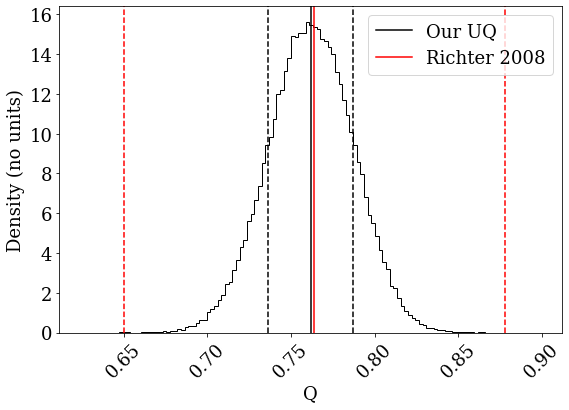

In [35]:
from matplotlib.lines import Line2D

y = emcee_trace[:]
# y = y[y>0.74]
plt.figure(figsize=(9,6))
plt.hist(y,bins=optimal_n_bins(y),histtype='step',density=True,color='k',label='This work')
# blocks = bayesian_blocks_mod(y)
# plt.hist(y, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks')
q_mean = np.mean(y)
q_std = np.std(y)
# plt.title(f"Quenching factor posterior")
print(f"Q(MCMC) = {q_mean:5.3} +/- {q_std:5.3}")
# plt.title(f"Quenching factor Q via MCMC\n{q_mean:5.3} +/- {q_std:5.3}")
plt.xlabel('Q')
plt.ylabel('Density (no units)')
qm = plt.axvline(q_mean,c='k',ls='-')
ql = plt.axvline(q_mean-q_std,c='k',ls='--')
qh = plt.axvline(q_mean+q_std,c='k',ls='--')
rm = plt.axvline(0.764,c='r',ls='-')
rl = plt.axvline(0.764 - 0.114,c='r',ls='--')
rh = plt.axvline(0.764 + 0.114,c='r',ls='--')
plt.xticks(rotation=45)
plt.xlim((q_mean-0.15,q_mean+0.15))
plt.legend([qm,rm],('Our UQ','Richter 2008'))
# plt.show()
plt.savefig('q_hist.png')

### B(GT) histograms, comparison w/ experiment
Each plot shows the shell-model distribution in blue, the USDB prediction in black (with standard deviation given by the distribution, and the experimental value in red.
Note that the uncertainty bands on experiment only include the tabulated experimental uncertainty from the data library and leave out our a priori uncertainty used in the determinaton of the quenching factor.

In [36]:
from scipy.stats import skew
from matplotlib.backends.backend_pdf import PdfPages

def format_nuc_name(s):
    A = s[:2]
    el = s[2:]
    A_up = r'$^{%s}$' % A
    return f'{A_up}{el}'

skew_array = np.full((n_transitions,2),None)

with PdfPages('GT_histograms_latest.pdf') as pdf:
    for ti in range(n_transitions):
#     for ti in range(15):
        if not df_usdb.iloc[ti]['include']:
            pass
        parent = df_usdb.iloc[ti]['parent']
    #     parent_mass = df_usdb.iloc[ti]['Ni'] + df_usdb.iloc[ti]['Zi']
        daughter = df_usdb.iloc[ti]['daughter']
    #     daughter_mass = df_usdb.iloc[ti]['Nf'] + df_usdb.iloc[ti]['Zf']
        decay_type = df_usdb.iloc[ti]['decay']
        ji = df_usdb.iloc[ti]['Ji']
        ni = df_usdb.iloc[ti]['ni']
        jf = df_usdb.iloc[ti]['Jf']
        nf = df_usdb.iloc[ti]['nf']

        Bexp = df_usdb.iloc[ti]['Bexp'] - 1.0*df_usdb.iloc[ti]['Fermi']

    #     Bexp_unc = np.sqrt(df_usdb.iloc[ti]['sigma_B']**2 + dBap**2)
        Bexp_unc = df_usdb.iloc[ti]['sigma_B']

        Bth_vec = np.array([df_dict[run_num_string].iloc[ti]['Bth_gA2'] for run_num_string in list(df_dict.keys()) ])
    #     for run_num_string in list(df_dict.keys()):
    #         Bth_vec.append(df_dict[run_num_string].iloc[ti]['Bth'])
        Bth_vec *= q_mean**2
        Bth_usdb = q_mean**2 * df_usdb['Bth_gA2'].iloc[ti]
#         Bth_unc = np.sqrt(np.std(Bth_vec)**2 + q_std**2)   ## CHECK DERIVATION
        Bth_unc = np.std(Bth_vec)

        plt.figure(figsize=(9,6))
        plt.hist(Bth_vec,optimal_n_bins(Bth_vec), histtype='step', density=True, color='k', label='USDB')
    #     blocks = bayesian_blocks_mod(Bth_vec)
    #     plt.hist(Bth_vec, bins=blocks, histtype='step', density=True, linewidth=2, label='Bayes blocks',alpha=0.7)
        if decay_type == 'b-':
            decay_str = r'$\beta^-$'
        elif decay_type == 'b+':
            decay_str = r'$\beta^+$'
        else:
            decay_str = r'$e.c.$'
        title_string = fr'{decay_str}: {format_nuc_name(parent)}$({ji}_{ni})$ --> {format_nuc_name(daughter)}$({jf}_{nf})$'
        plt.title(title_string)
        plt.xlabel('B(GT)')

        plt.axvline(Bexp,c='r',ls='-',label='Experiment')
        plt.axvline(Bexp+Bexp_unc,c='r',ls=':')
        plt.axvline(Bexp-Bexp_unc,c='r',ls=':')

        plt.axvline(Bth_usdb,c='k',ls='--')
        plt.axvline(Bth_usdb+Bth_unc,c='k',ls='--')
        plt.axvline(Bth_usdb-Bth_unc,c='k',ls='--')
        
        plt.legend()
        plt.tight_layout()
        pdf.savefig()
        plt.close()
#         plt.show()

        if 'b-' in decay_type:
            skew_array[ti,:] = np.array([skew(Bth_vec),-1])
        else:
            skew_array[ti,:] = np.array([skew(Bth_vec),+1])